In [1]:
import bForStrain as bFS


westUS_mesh=bFS.Mesh()
westUS_mesh.construct()
inversion_results = bFS.Inversion(westUS_mesh)


Building mesh from coordinates and extent given in inputs.py

 Smooth triangulation...

 -----------------------------------------------------------------------
      |ITER.|          |MOVE(X)|          |DTRI(X)|          |T. ITER|  
 -----------------------------------------------------------------------
          4                905               2818             0.037000
          8                374               2834             0.039000
         12                 18               2832             0.040000
         16                  3               2832             0.040000
         20                  2               2832             0.040000
         24                  2               2832             0.040000
         28                  2               2832             0.040000
         32                  2               2832             0.039000

Computing Body Force Green's Functions
Computing Creepings Green's functions calculation
  10 % completed
  20 % completed
 

In [3]:
westUS_mesh.save_mesh_vtk(save_data=True)

In [4]:
import pyvista as pv
import numpy as np

In [41]:
mesh_in = pv.read('09-08-2024_10:41_data.vtk')
nodes = np.array(mesh_in.points[:,0:2])
nelts = int(len(mesh_in.cell_connectivity)/3)
tri = np.reshape(mesh_in.cell_connectivity,[nelts,3])

In [50]:
test=False

In [54]:
mesh_in = pv.read('09-08-2024_10:41_data.vtk')
xy_gps = np.array(mesh_in.points[:,0:2])

In [60]:
mesh_in.point_data

pyvista DataSetAttributes
Association     : POINT
Active Scalars  : Observed Velocity
Active Vectors  : None
Active Texture  : None
Active Normals  : None
Contains arrays :
    Observed Velocity       float64    (993, 2)             SCALARS
    Velocity Uncertainty    float64    (993, 2)

In [61]:
Ve = mesh_in.point_data['Observed Velocity'][:,0]
Vn = mesh_in.point_data['Observed Velocity'][:,1]

Sige = mesh_in.point_data['Velocity Uncertainty'][:,0]
Sign = mesh_in.point_data['Velocity Uncertainty'][:,1]

In [64]:
from tools import local2llh
lonlat = local2llh(xy_gps[:,0],xy_gps[:,1])
lon = lonlat[:,0]
lat = lonlat[:,1]

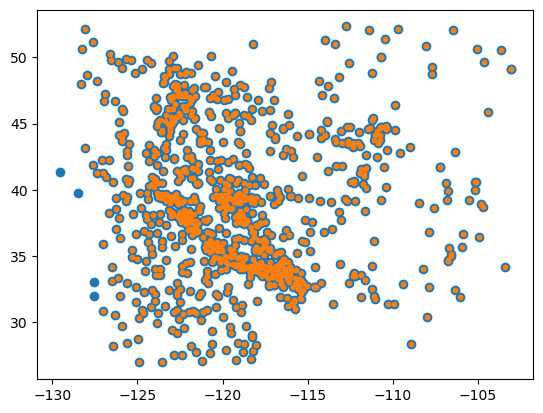

In [66]:
import matplotlib.pyplot as plt
plt.scatter(westUS_mesh.lon,westUS_mesh.lat)
plt.scatter(lon,lat,s=10)

In [2]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.patches import Ellipse

def plot_velocity_with_ellipses(xys,Ve, Vn, Cov_Ve, Cov_Vn, scale=1.0, ellipse_color='r'):
    fig, ax = plt.subplots(figsize=(12,12))
    ax.figsize=12
    # Plot the quiver plot
    ax.quiver(xys[:,0],xys[:,1], Ve, Vn, angles='xy', scale_units='xy', scale=scale)

    # Add ellipses for uncertainties
    for i in range(len(Ve)):
        # Extract the covariance matrix for this vector
        cov = np.array([[Cov_Ve[i, i], 0], [0, Cov_Vn[i, i]]])a
        
        # Calculate eigenvalues and eigenvectors
        eigenvalues, eigenvectors = np.linalg.eigh(cov)
        
        # Width and height of the ellipse
        width, height = 2 * np.sqrt(eigenvalues)*5/scale
        
        # Angle of the ellipse
        angle = np.degrees(np.arctan2(*eigenvectors[:, 0][::-1]))

        # Create and add the ellipse patch
        ellipse = Ellipse((xys[i,0], xys[i,1]), width, height, angle=angle, edgecolor=ellipse_color, facecolor='none')
        ax.add_patch(ellipse)

    ax.set_aspect('equal')
    plt.show()


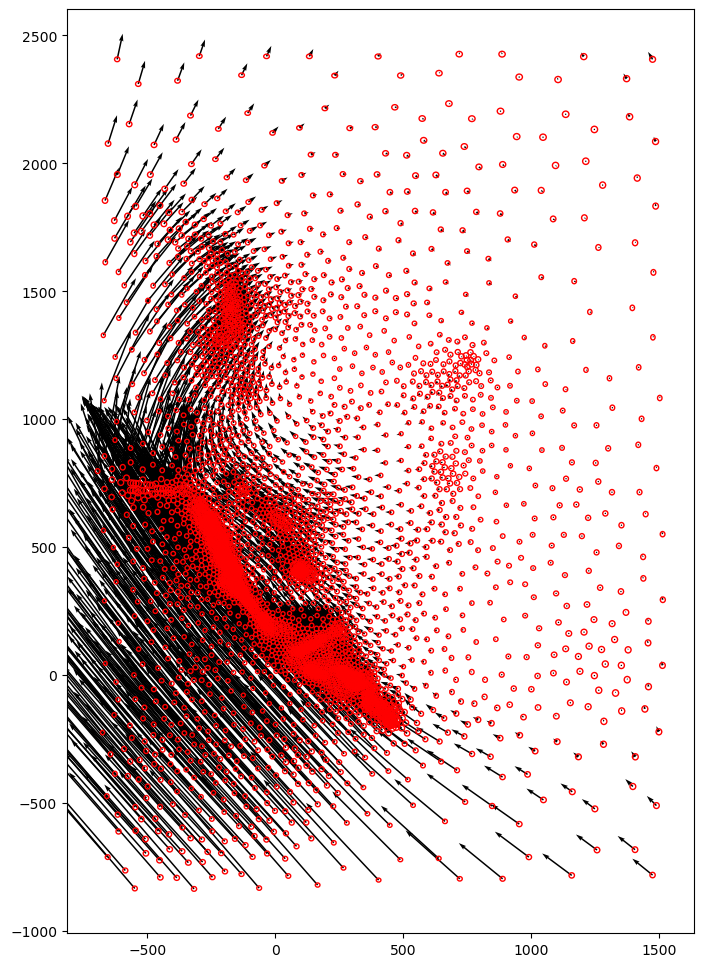

In [3]:

Ve = inversion_results.Ve[0]
Vn = inversion_results.Vn[0]
Cov_Ve = inversion_results.Cov_Ve[0]
Cov_Vn = inversion_results.Cov_Vn[0]

xy_obs  = westUS_mesh.tri_centroids

plot_velocity_with_ellipses(xy_obs,Ve, Vn, Cov_Ve, Cov_Vn,scale=0.1)